# Univariate Linear Regression in Python

* From a set of data $(x_i, y_i)$ find a linear relationship between them.
* We can express this linear relationship as $y = a*x + b + noise$
* Noise can be represented some distribution as the uniform $U(a,b)$ or normal $\mathcal{N}(\mu,\,\sigma^{2})$.

# 1. Generating Data

* Let's generate some data to work with. 

In [1]:
import numpy as np

def get_data(m_samples, a, b):
    
    # Generate some noise: uniform distribution on interval [0,1]
    random_noise = np.random.normal(0,1,m_samples) # 

    # Generate X input from uniform distribution in range [0, 10] 
    x_input =  np.random.uniform(0,10,m_samples)
    x_input.sort()
    
    #y = a*x + b + noise (univariate linear regression model with noise)
    y_input = a*x_input + b + random_noise
    data_xy = x_input, y_input
    
    return data_xy


data_xy = get_data(m_samples = 40, a=1.5, b=1)

print('x values')
print(data_xy[0])

print('\n\ny values:')
print(data_xy[1])

x values
[0.05252591 0.25593633 0.43022378 0.44044366 0.45771483 0.76664712
 0.8658378  1.0160191  1.220832   1.98703664 2.38098961 2.4951307
 2.52328295 2.55038407 3.09695156 3.64980249 3.82411247 3.85912952
 4.31997495 4.42261565 4.80333558 4.92746751 5.43733323 5.50216454
 6.07641009 6.20428269 6.31088796 6.60435784 6.64734576 6.82775142
 6.86106051 6.95811046 7.5247378  7.54106131 8.10622875 8.19783903
 8.5923026  8.73184044 8.76198549 8.94623048]


y values:
[ 2.22178375  0.90753156  2.87490296  0.20405276  1.56721488  1.07328428
  0.8543049   2.68245952  4.38647944  3.90906762  5.41720589  4.69890396
  3.27056449  3.86305612  4.69904434  6.70017053  8.52928395  6.50622509
  5.99168452  5.27234272  5.62987503  8.45424351  9.88642882  9.04737746
  9.75639696 10.10397002 11.64162016 10.90772795  9.71605703 10.34682127
 11.56043981 10.70086605 12.21282881 12.06906892 14.49285642 15.82426091
 16.77461645 15.71235115 15.39032546 14.48171222]


* **How this data looks like: **

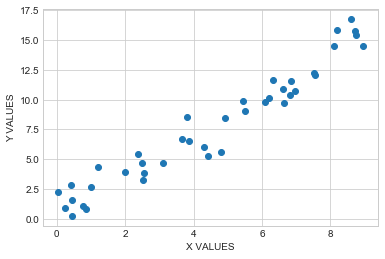

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

x_input, y_input = data_xy
plt.plot(x_input, y_input,  'o')
plt.xlabel('X VALUES')

plt.ylabel('Y VALUES')
plt.show()

---

# 2. Build Model

* Linear regression represented as a function: f(x) = a*x + b
* Function $f(x)$ contains $x$ as variable and $a, b$ as parameters (to be optimized) 


In [8]:
def linear_regression_model(a, b):
    #All we need to represent a linear regression model (y = a*x + b)
    model = {}
    model['a'] = a
    model['b'] = b  
    return model

def f(X, model):
    # linear regression function
    a = model['a']
    b = model['b']
    return a*X + b

* **Testing model and visualization:**

(x: 0.200000,y: 0.220000)


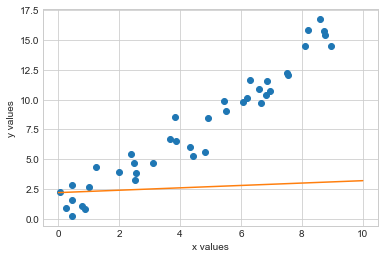

In [9]:
def test_model():
    # Check if all is working
    model = linear_regression_model(a=0.1, b=0.2)
    x = 0.2
    y = f(x, model)
    print('(x: %f,y: %f)'%(x,y))
    
def print_model(model):
    # print model which has 'a' and 'b' random parameters (not optimized yet)
    x1, x2 = 0, 10
    y1, y2 = y = f(x1, model), f(x2, model)
    x_input, y_input = data_xy

    plt.plot(x_input, y_input, 'o')
    plt.plot([x1, x2], [y1, y2])
    plt.xlabel('x values')
    plt.ylabel('y values')
    plt.show()
    None
    
model = linear_regression_model(a=0.1, b=2.2)   
test_model()
print_model(model)

---

# 3. Define the loss function

* $Loss = (1/2m) * \sum(f(x) - y)^2 $ 

In [10]:
def loss(data, model):
    x_input, y_input = data_xy
    m = len(x_input)
    
    y_pred = [f(x, model) for x in x_input] # y_pred --> f(x)
    return sum((y_pred - y_input)**2)/(2*m) # Loss
    
def test_loss():
    model = linear_regression_model(a=0.0, b=0.0)
    
    l = loss(data_xy, model)
    print('loss:', round(l,2))
    None
    
test_loss()

loss: 41.21


---

# 4. Update params using Gradient Descent

In [19]:
def get_hyper_params():
    # alpha: update rate param
    hyper_p = {}
    hyper_p['alpha'] = 0.01

    return hyper_p

def optimise_by_gradient_descent(hyper_p, model, data_xy, n_ite = 30):
    # iterate 'n_ite' times and optimise using gradient descent

    x_input, y_input = data_xy
    m = len(x_input)
    alpha = hyper_p['alpha']
    
    loss_i = []  #save loss at time i
    for i in range(n_ite):  
        
        y_pred = [f(x, model) for x in x_input] # f(x)
        ypred_minus_y =  (y_pred - y_input) 

        dloss_dm = sum (ypred_minus_y * x_input) / m  # derivate loss w.r.t 'a'
        dloss_db = sum (ypred_minus_y ) / m           # derivate loss w.r.t 'b'

        model['a'] = model['a'] - (alpha * dloss_dm)  #update 'a' param
        model['b'] = model['b'] - (alpha * dloss_db)  #update 'b' param      
        
        print_step = 5
        if i%print_step ==0 : # Every 'print_step' print loss
            print('i:', i, 'ite: ',end = '')
            print('loss:',round(loss(data_xy,model),3))
            
        loss_i.append(loss(data_xy,model))
    
    print('final loss: ', round(loss(data_xy,model),3))
    return model, loss_i
    

hyper_p = get_hyper_params()
model = linear_regression_model(a=0.0, b=0.0)
model, loss_i = optimise_by_gradient_descent(hyper_p, model, data_xy, n_ite = 10)   

i: 0 ite: loss: 21.139
i: 5 ite: loss: 1.358
final loss:  0.732


---

# 5. Print model after optimisation

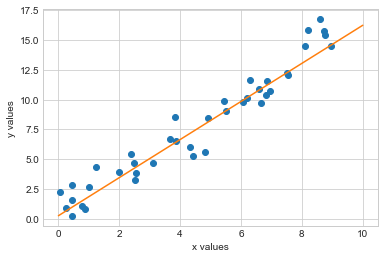

In [20]:
print_model(model)

# 5. Print loss with time i

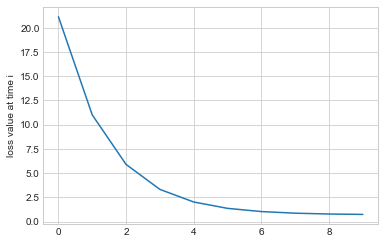

In [21]:
def print_loss(loss_i):
    x = list(range(len(loss_i)))
    plt.plot(x, loss_i)
    plt.ylabel('time i')
    plt.ylabel('loss value at time i')
    plt.show()
    None
 
print_loss(loss_i)

---